In [1]:
# Basically this imports all needed packages
import pandas as pd
from sklearn.datasets import make_blobs, make_moons
from numpy import mean
from numpy import std
from numpy.random import randn
from numpy.random import seed
from numpy import cov
from scipy.stats import pearsonr 
from matplotlib import pyplot
from matplotlib.colors import ListedColormap
import sympy as sympy
import numpy as np
from scipy import *
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from IPython.display import display, Math, Latex
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from icecream import ic

In [28]:
 #imports two small moons in 2D and one target vairable y
 X, y = make_moons(n_samples=3000, random_state=0)

In [29]:
#we use the values of the first column, shuffle it randomly and create the 3rd dimension by this
Z1 = [item[0] for item in X]
Z = sorted(Z1, key=lambda v: (v, random.random()))
Z = np.array(Z)


In [30]:
#merges a 2D np array and 1D array to an 3D array
X = np.column_stack((X, Z))

In [31]:
#This code moves the positive class so it becomes 2 touching parabola 
pca1 = [item[0] for item in X]
pca2 = [item[1] for item in X]
pca3 = [item[2] for item in X]

for i in range(len(X)):
    if y[i] == 1:
        pca1[i] -= 1
        pca2[i] += 1.5


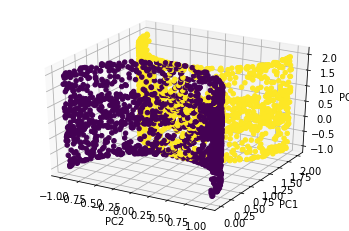

In [33]:
#creates a 3D projection of the 2 touching parabola
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

ax.set_ylabel("PC1")
ax.set_xlabel("PC2")
ax.set_zlabel("PC3")

ax.scatter(pca1, pca2, pca3, c=y, alpha = 1)
plt.show()

In [34]:
#create a new X array with the moved values
X = pd.DataFrame()
X["pca1"] = pca1
X["pca2"] = pca2
X["pca3"] = pca3
X = X.to_numpy()

<ipython-input-35-748e717a2672>:19: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  sum_EVal = sum(EVal)


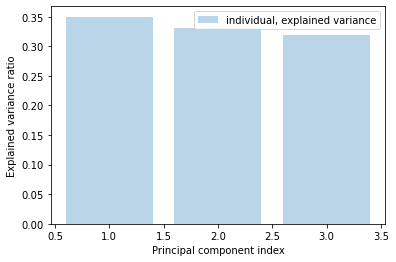

In [35]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)

# Standardize the features (zero mean, unit variance) 
sc = StandardScaler()

# Fit results must be used later (mu and sigma)
X_train_std = sc.fit_transform(X_train) 

# Normalize test data set with mu/sigma of training data
X_test_std = sc.transform(X_test)

# Compute covariance matrix and eigenvalues (EVal) / eigenvectors (EVec)
cov_mat = np.cov(X_train_std.T)
EVal, EVec = np.linalg.eig(cov_mat)


# Calculate (sum of) explained variances
sum_EVal = sum(EVal)
var_exp = [(i / sum_EVal) for i in sorted(EVal, reverse=True)]
scurr = [1, 2, 3]


# Plot explained variances
plt.bar(scurr, var_exp, alpha=0.3, 
        align='center', label='individual, explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

In [36]:
# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(EVal[i]), EVec[:, i]) for i in range(len(EVal))]

# Sort the (EVal, EVec) tuples from high to low (reverse), key=EV
eigen_pairs.sort(key=lambda k: k[0], reverse=True)
w = np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis]))
X_train_pca = X_train_std.dot(w)

In [37]:
# Set up PCA and logistic regression model
pca = PCA(n_components=2)
lr = LogisticRegression(multi_class='ovr', solver='liblinear')

# Fit and transform training data, given on PCA reduction to k(=3) principle components
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

lr.fit(X_train_pca, y_train)

LogisticRegression(multi_class='ovr', solver='liblinear')

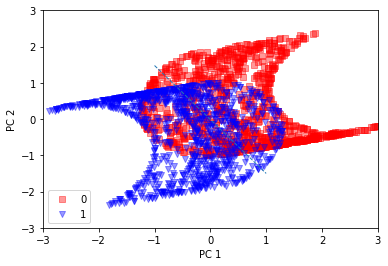

In [39]:
colors = ['r', 'b']
markers = ['s', 'v']
#
b = lr.intercept_[0]
w1, w2 = lr.coef_.T
c = -b/w2
m = -w1/w2

xmin, xmax = -1, 1
ymin, ymax = -0.5, 0.5
xd = np.array([xmin, xmax])
yd = m*xd + c
plt.plot(xd, yd, lw=1, ls='--')
plt.xlim(-3, 3)
plt.ylim(-3, 3)

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train==l, 0], # Pick x component for label
                X_train_pca[y_train==l, 1], 
                color=c, label=l, marker=m, alpha=0.4)

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.show()